Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the csv file
data=pd.read_csv("/content/E_Commerce.csv")

In [4]:
#Performing EDA
#Retrives top 5 rows
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
#Provides the dimension of the dataset
data.shape

(10999, 12)

In [6]:
#Checks the datatype of each column
data.dtypes

,0
ID,int64
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64


In [7]:
#Checks for null values
data.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [8]:
#Checks for duplicate data
data.duplicated().sum()

0

In [9]:
#Provides distribution of the data
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Creating Visuals to gain Meaningful insights and patterns using Univariate and bivariate analysis

Text(0.5, 1.0, 'Gender Distribution')

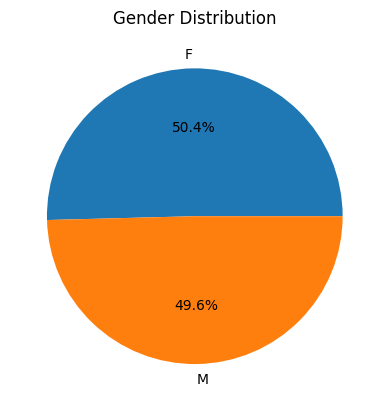

In [10]:
#Customer Gender Distribution
plt.pie(data["Gender"].value_counts(),labels=["F","M"],autopct="%1.1f%%")
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Cost of Product')

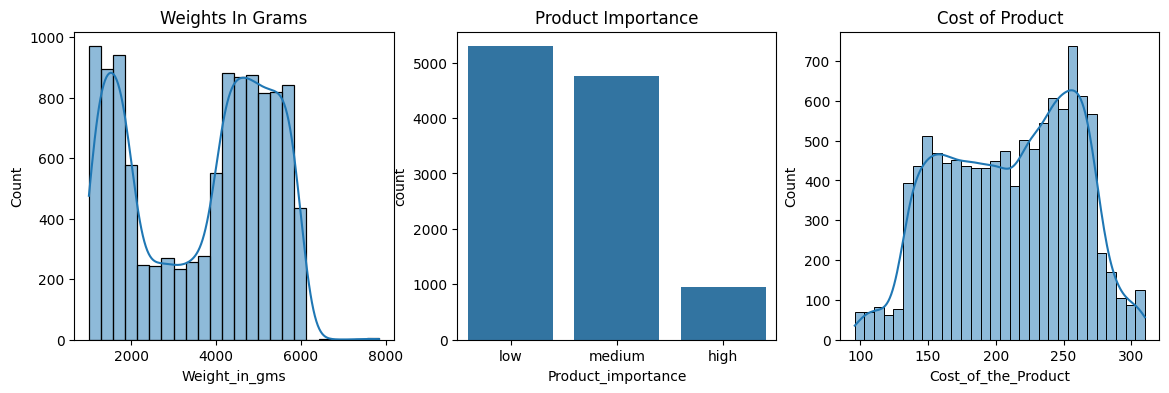

In [11]:
#Distribution of Product Properties
fig,ax=plt.subplots(1,3,figsize=(14,4))
sns.histplot(data["Weight_in_gms"],ax=ax[0],kde=True).set_title("Weights In Grams")
sns.countplot(x="Product_importance",data=data,ax=ax[1]).set_title("Product Importance")
sns.histplot(data["Cost_of_the_Product"],ax=ax[2],kde=True).set_title("Cost of Product")

Text(0.5, 1.0, 'Reached on Time Y.N')

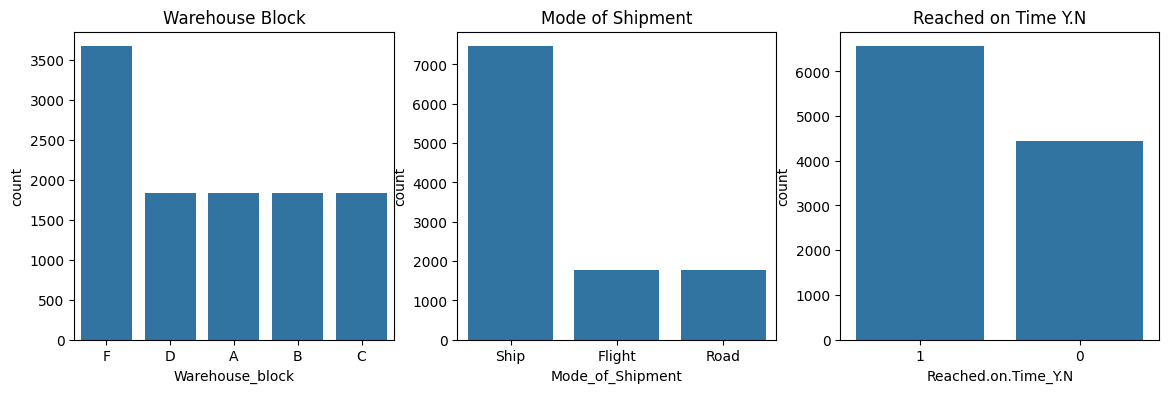

In [12]:
#Distribution of logistics and Reached on Time
fig,ax=plt.subplots(1,3,figsize=(14,4))
sns.countplot(x="Warehouse_block",data=data,ax=ax[0],order=data['Warehouse_block'].value_counts().index).set_title("Warehouse Block")
sns.countplot(x="Mode_of_Shipment",data=data,ax=ax[1],order=data['Mode_of_Shipment'].value_counts().index).set_title("Mode of Shipment")
sns.countplot(x="Reached.on.Time_Y.N",data=data,ax=ax[2],order=data['Reached.on.Time_Y.N'].value_counts().index).set_title("Reached on Time Y.N")

Text(0.5, 1.0, 'Discount Offered')

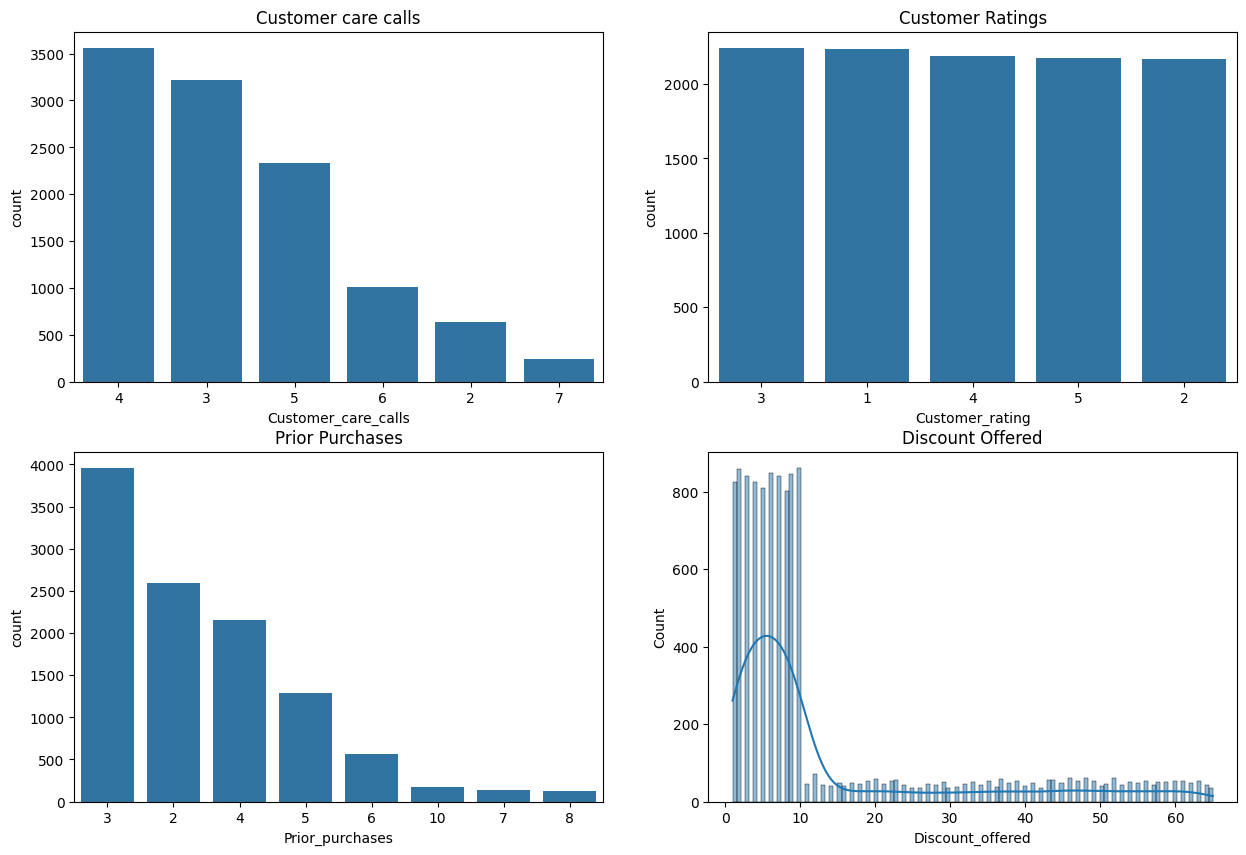

In [13]:
#Customer Experience Distribution
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x="Customer_care_calls",data=data,ax=ax[0,0],order=data['Customer_care_calls'].value_counts().index).set_title("Customer care calls")
sns.countplot(x="Customer_rating",data=data,ax=ax[0,1],order=data['Customer_rating'].value_counts().index).set_title("Customer Ratings")
sns.countplot(x="Prior_purchases",data=data,ax=ax[1,0],order=data['Prior_purchases'].value_counts().index).set_title("Prior Purchases")
sns.histplot(data["Discount_offered"],ax=ax[1,1],kde=True).set_title("Discount Offered")

Text(0.5, 1.0, 'Gender Vs Reached On Time')

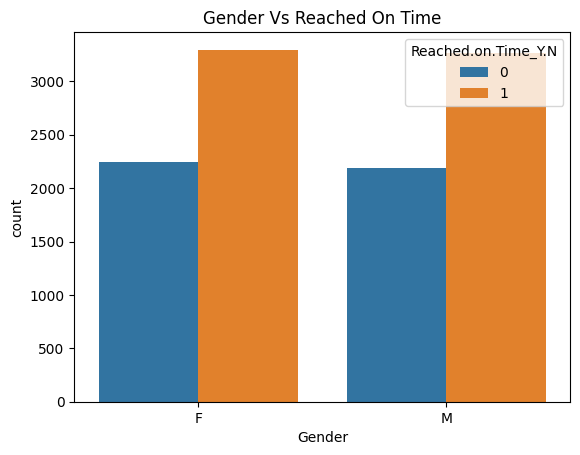

In [14]:
sns.countplot(data=data,x="Gender",hue="Reached.on.Time_Y.N").set_title("Gender Vs Reached On Time")

Text(0.5, 1.0, 'Cost_of_the_Product')

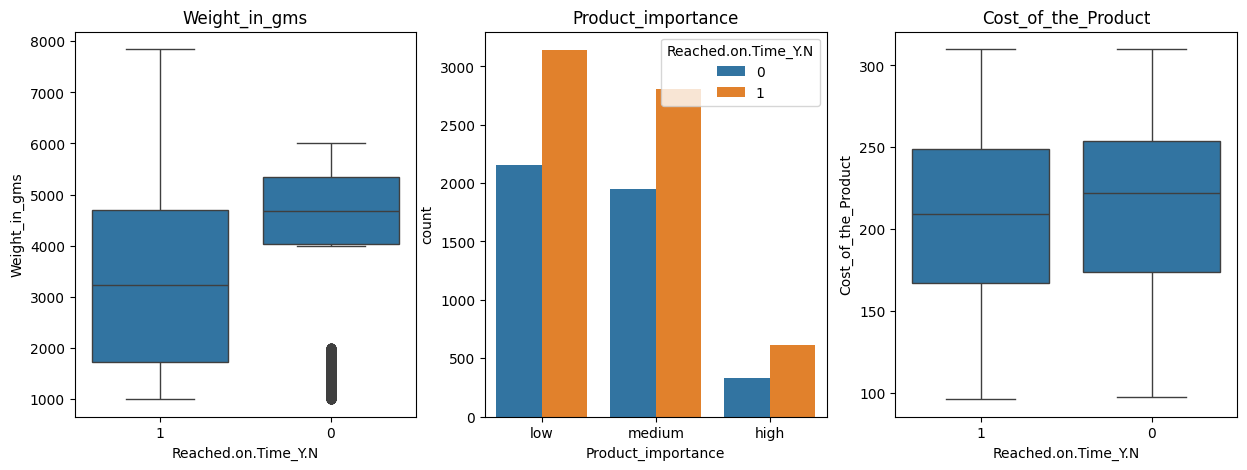

In [15]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data,x="Reached.on.Time_Y.N",y="Weight_in_gms",ax=ax[0],order=data['Reached.on.Time_Y.N'].value_counts().index).set_title("Weight_in_gms")
sns.countplot(data=data,x="Product_importance",hue="Reached.on.Time_Y.N",ax=ax[1],order=data['Product_importance'].value_counts().index).set_title("Product_importance")
sns.boxplot(data=data,x="Reached.on.Time_Y.N",y="Cost_of_the_Product",ax=ax[2],order=data['Reached.on.Time_Y.N'].value_counts().index).set_title("Cost_of_the_Product")

Text(0.5, 1.0, 'Mode of Shipment')

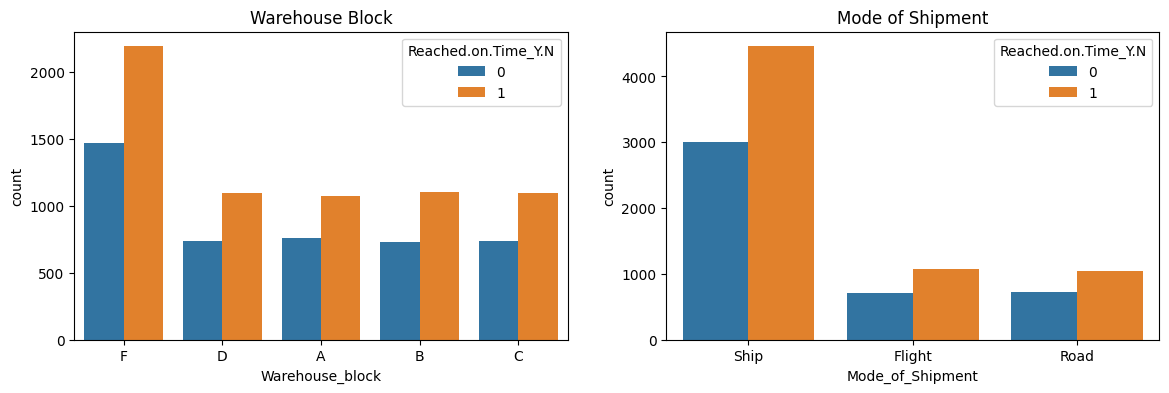

In [16]:
fig,ax=plt.subplots(1,2,figsize=(14,4))
sns.countplot(data=data,x="Warehouse_block",hue="Reached.on.Time_Y.N",ax=ax[0],order=data['Warehouse_block'].value_counts().index).set_title("Warehouse Block")
sns.countplot(data=data,x="Mode_of_Shipment",hue="Reached.on.Time_Y.N",ax=ax[1],order=data['Mode_of_Shipment'].value_counts().index).set_title("Mode of Shipment")

Text(0.5, 1.0, 'Discount_offered')

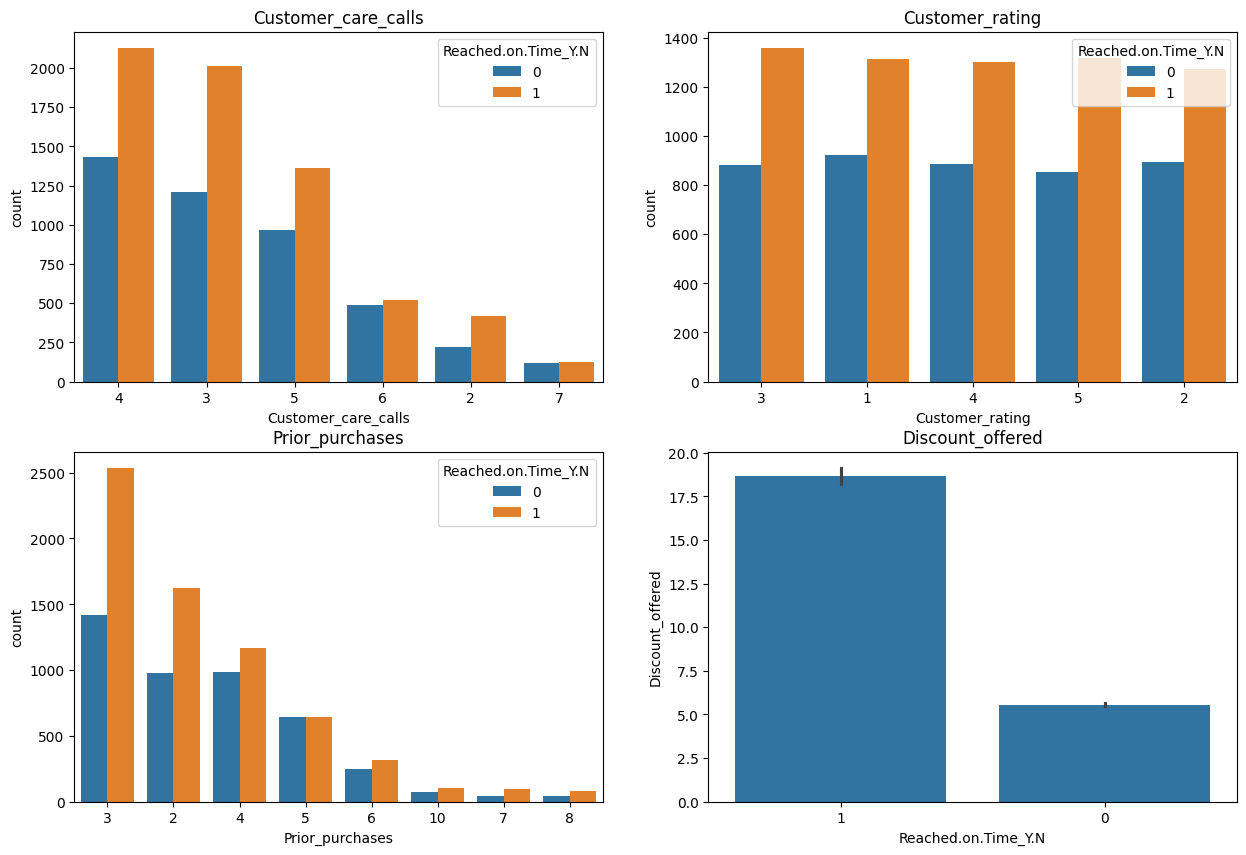

In [17]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(data=data,x="Customer_care_calls",hue="Reached.on.Time_Y.N",ax=ax[0,0],order=data["Customer_care_calls"].value_counts().index).set_title("Customer_care_calls")
sns.countplot(data=data,x="Customer_rating",hue="Reached.on.Time_Y.N",ax=ax[0,1],order=data['Customer_rating'].value_counts().index).set_title("Customer_rating")
sns.countplot(data=data,x="Prior_purchases",hue="Reached.on.Time_Y.N",ax=ax[1,0],order=data['Prior_purchases'].value_counts().index).set_title("Prior_purchases")
sns.barplot(data=data,y="Discount_offered",x="Reached.on.Time_Y.N",ax=ax[1,1],order=data['Reached.on.Time_Y.N'].value_counts().index).set_title("Discount_offered")

In [18]:
#Using labelencoding for converting categorical features into numeric and applying standardscaler to scale the input data
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [19]:
lb=LabelEncoder()
data["Warehouse_block"]=lb.fit_transform(data["Warehouse_block"])
data["Mode_of_Shipment"]=lb.fit_transform(data["Mode_of_Shipment"])
data["Product_importance"]=lb.fit_transform(data["Product_importance"])
data["Gender"]=lb.fit_transform(data["Gender"])

In [20]:
data.drop(['ID'],axis=1,inplace=True)

Using chi2 square test for feature selection.

In [21]:
data1=data.copy()

In [22]:
chi2_X=data1.drop("Reached.on.Time_Y.N",axis=1)
chi2_Y=data1["Reached.on.Time_Y.N"]

In [23]:
from sklearn.feature_selection import chi2

In [24]:
chi_Scores=chi2(chi2_X,chi2_Y)

<Axes: >

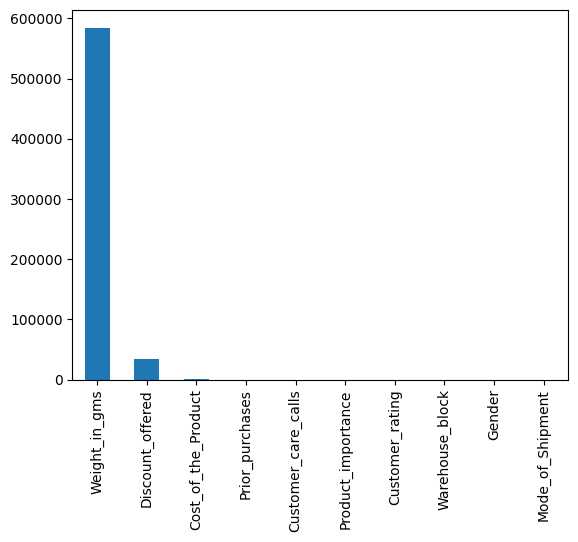

In [25]:
chi_values=pd.Series(chi_Scores[0],index=chi2_X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

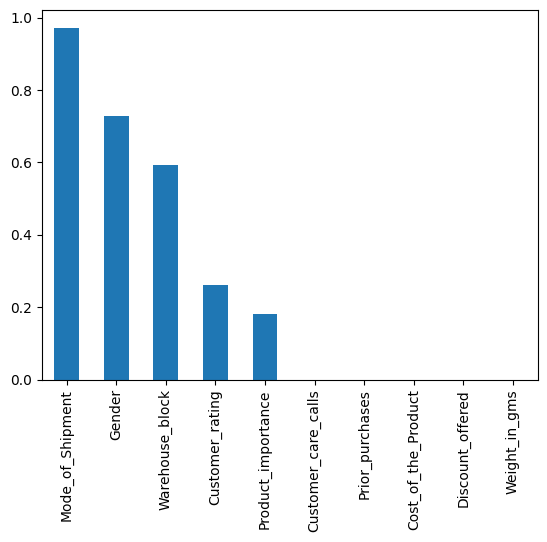

In [26]:
p_values=pd.Series(chi_Scores[1],index=chi2_X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

From chi2_square we can conclude that three of the independent categorical features:Mode of shipment,Gender and Warehouse Block are not related to the target variable as the p-value is greater than 0.05.So these features can be removed.

In [27]:
X=data.drop(['Reached.on.Time_Y.N','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
Y=data["Reached.on.Time_Y.N"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
#Split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [30]:
#Preprocessing
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier() #Define Model

In [32]:
rfc.fit(X_train,Y_train) #Fit model

RandomForestClassifier()

In [33]:
rf_Pred=rfc.predict(X_test) #Predictions

In [34]:
print(accuracy_score(rf_Pred,Y_test)) #Evaluate

0.6513636363636364


In [35]:
print(confusion_matrix(rf_Pred,Y_test))

[[574 492]
 [275 859]]


HyperParameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score
k=5
cv=cross_val_score(rfc,X,Y,cv=k)

In [ ]:
param_grid={
    "n_estimators":[4,6,10,],
    "max_depth":[4,6,8,12,16],
    "min_samples_leaf":[2,4,7,6,8],
    "min_samples_split":[2,4,7,6,8],
    "criterion":["gini","entropy"]
}

In [ ]:
grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring="accuracy")

In [ ]:
grid.fit(X_train,Y_train)

In [ ]:
bestparam=grid.best_params_

In [ ]:
rfc=RandomForestClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 4,min_samples_split= 2,n_estimators= 10)

In [ ]:
rfc.fit(X_train,Y_train)

In [ ]:
rf_Pred=rfc.predict(X_test)

In [ ]:
accuracy_score(rf_Pred,Y_test)

In [ ]:
rf_Pred_train=rfc.predict(X_train)

In [ ]:
accuracy_score(rf_Pred_train,Y_train)

In [ ]:
print(classification_report(rf_Pred,Y_test))

In [ ]:
cmr=confusion_matrix(rf_Pred,Y_test)

In [ ]:
sns.heatmap(cmr,
            annot=True,
            fmt='g',
            xticklabels=['ON_Time','Delayed'],
            yticklabels=['ON_Time','Delayed'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

After hyperparameter tunning for Random Forest we got an increased accuracy.Also,the model is performing good in both training and testing phase.It is a generalized model

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,Y_train)

In [ ]:
dtc_Pred=dtc.predict(X_test)

In [ ]:
accuracy_score(dtc_Pred,Y_test)

HyperParameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score
k=5
cv=cross_val_score(dtc,X,Y,cv=k)

In [ ]:
param_grid1={
    "max_depth":[4,6,9],
    "min_samples_leaf":[4,6,8],
    "min_samples_split":[2,4,6,8],
    "criterion":["gini","entropy"]
}

In [ ]:
grid1=GridSearchCV(estimator=dtc,param_grid=param_grid1,cv=5,scoring="accuracy")

In [ ]:
grid1.fit(X_train,Y_train)

In [ ]:
bestparam1=grid1.best_params_

In [ ]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth= 4,min_samples_leaf= 4,min_samples_split= 2)

In [ ]:
dtc.fit(X_train,Y_train)

In [ ]:
dtc_Pred=dtc.predict(X_test)

In [ ]:
accuracy_score(dtc_Pred,Y_test)

In [ ]:
dtc_Pred_train=dtc.predict(X_train)

In [ ]:
accuracy_score(dtc_Pred_train,Y_train)

In [ ]:
print(classification_report(dtc_Pred,Y_test))

In [ ]:
cmd=confusion_matrix(dtc_Pred,Y_test)

In [ ]:
sns.heatmap(cmd,
            annot=True,
            fmt='g',
            xticklabels=['ON_Time','Delayed'],
            yticklabels=['ON_Time','Delayed'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

In [ ]:
lr_Pred=lr.predict(X_test)

In [ ]:
print(accuracy_score(lr_Pred,Y_test))

In [ ]:
lr_Pred_train=lr.predict(X_train)

In [ ]:
print(accuracy_score(lr_Pred_train,Y_train))

In [ ]:
print(classification_report(lr_Pred,Y_test))

In [ ]:
cml=confusion_matrix(lr_Pred,Y_test)

In [ ]:
sns.heatmap(cml,
            annot=True,
            fmt='g',
            xticklabels=['ON_Time','Delayed'],
            yticklabels=['ON_Time','Delayed'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
accuracy_score(knn_pred,Y_test)

In [ ]:
knn_pred_train=knn.predict(X_train)

In [ ]:
accuracy_score(knn_pred_train,Y_train)

In [ ]:
print(classification_report(knn_pred,Y_test))

In [ ]:
cmk=confusion_matrix(knn_pred,Y_test)

In [ ]:
sns.heatmap(cmk,
            annot=True,
            fmt='g',
            xticklabels=['ON_Time','Delayed'],
            yticklabels=['ON_Time','Delayed'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

SVM

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [ ]:
svm=svm.SVC(kernel="linear",C=1)

In [ ]:
svm.fit(X_train,Y_train)
svm_pred=svm.predict(X_test)

In [ ]:
accuracy_score(svm_pred,Y_test)

In [ ]:
svm_pred_train=svm.predict(X_train)
accuracy_score(svm_pred_train,Y_train)

In [ ]:
print(classification_report(svm_pred,Y_test))

In [ ]:
cms=confusion_matrix(svm_pred,Y_test)

In [ ]:
sns.heatmap(cms,
            annot=True,
            fmt='g',
            xticklabels=['ON_Time','Delayed'],
            yticklabels=['ON_Time','Delayed'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Feature Importance

In [ ]:
#Creating a feature importance dataframe
feat_imp = pd.DataFrame(rfc.feature_importances_.tolist(), X.columns.tolist()).reset_index(names = 'Feature').rename(columns = {0 : 'Importance'}).sort_values('Importance', ascending = False)
fig, ax = plt.subplots()
#Plotting feature importance barchart
sns.barplot(ax = ax, data = feat_imp, y = 'Feature', x = 'Importance', palette = 'Blues_r')
ax.set_title('Random Forest Feature Importance')
plt.show()